###     下载并读取口岸通关数据，完成以下需求：

    1. 创建柱形图，展示各发布时间年份的平均通关人次；

    2. 创建箱型图，展示各发布时间年份的通关人次分布；

    3. 创建箱型图，展示各发布时间年份的通关人次分布，通过倍数调整“胡须”长度以包含2018年的异常值。

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
sh=pd.read_csv(r'C:\Users\YcAllenEffy\Desktop\口岸出入境.csv')
df=sh

In [2]:
df

,统计时间,发布时间,通关人次
0,2018年10月,2018/10/1,2237.2
1,2018年11月,2018/11/1,2128.5
2,2018年12月,2018/12/1,2336.4
3,2018年1月,2018/1/1,2097.4
4,2018年2月,2018/2/1,1891.5
...,...,...,...
37,2021年2月,2021/3/15,46.9
38,2021年3月,2021/4/15,68.1
39,2021年4月,2021/5/17,66.1
40,2021年5月,2021/6/15,66.1


In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
#设置画图 中文字体初始化
sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

In [7]:
df['年份']=pd.to_datetime(df['发布时间'])
df['年份']=df['年份'].dt.year
df


,统计时间,发布时间,通关人次,年份
0,2018年10月,2018/10/1,2237.2,2018
1,2018年11月,2018/11/1,2128.5,2018
2,2018年12月,2018/12/1,2336.4,2018
3,2018年1月,2018/1/1,2097.4,2018
4,2018年2月,2018/2/1,1891.5,2018
...,...,...,...,...
37,2021年2月,2021/3/15,46.9,2021
38,2021年3月,2021/4/15,68.1,2021
39,2021年4月,2021/5/17,66.1,2021
40,2021年5月,2021/6/15,66.1,2021


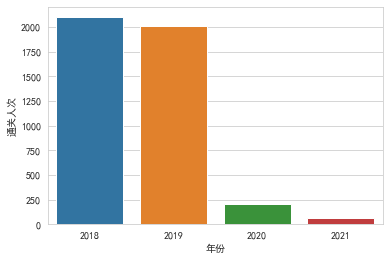

In [22]:
sns.barplot(data=df,x='年份',y='通关人次',estimator=np.mean,ci=None)

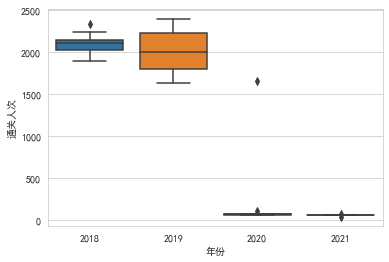

In [13]:
sns.boxplot(x='年份',y='通关人次',data=df)

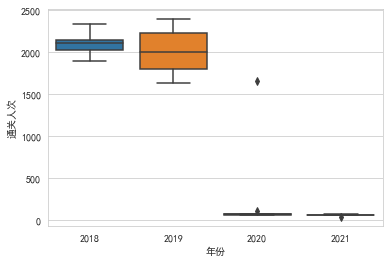

In [20]:
sns.boxplot(x='年份',y='通关人次',data=df,whis=2)

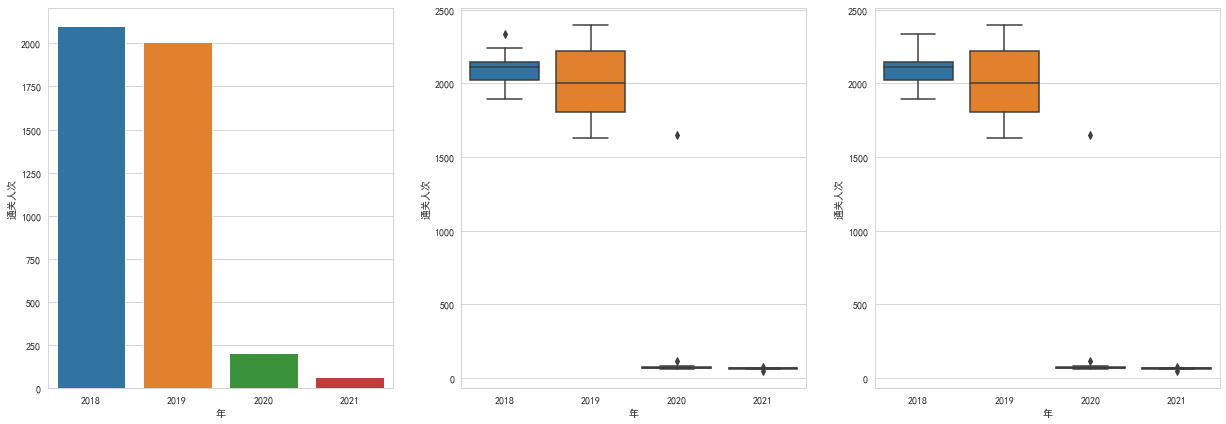

In [21]:
# 标准答案
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

# df = pd.read_csv(r'.\口岸出入境.csv')
df['发布时间'] = pd.to_datetime(df['发布时间'])
df['年'] = df['发布时间'].dt.year

fig, axs = plt.subplots(1, 3, figsize=(21, 7))
sns.barplot(data=df, x='年', y='通关人次', ax=axs[0], ci=None)
sns.boxplot(data=df, x='年', y='通关人次', ax=axs[1])
sns.boxplot(data=df, x='年', y='通关人次', ax=axs[2], whis=1.6);

###  下载并读取口岸通关数据，完成以下需求：

    1. 创建散点图，展示发布时间是2018年的通关人次分布；

    2. 创建箱型图，展示发布时间是2018年的通关人次分布，通过比例调整胡须长度以包含所有数值；

    3. 创建箱型图，展示发布时间是2020年的通关人次分布，不显示异常值。

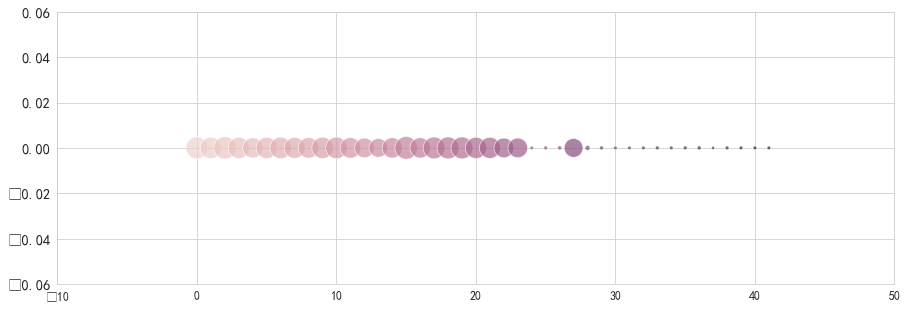

In [28]:
df2018=df[df['年份']==2018]
sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
#图表长15，宽5，透明度0.7，隐藏图例，点的面积、轴标签调整为合适的大小
g = sns.scatterplot(x=df.index, y=[0]*len(df), data=df, 
                    size='通关人次', alpha=0.7, hue=df.index, legend=False, 
                    sizes=( 10, 10 * df['通关人次'].max()/df['通关人次'].min() ))

g.figure.set_size_inches(15, 5) #图形大小设置
g.figure.canvas.draw() #画图
g.set_xticks(g.get_xticks())# 获取x轴数值
g.set_yticks(g.get_yticks()) #获取y轴数值
g.set_xticklabels(labels=g.get_xticklabels(), size='large')#x轴标签字体设置large 大号
g.set_yticklabels(labels=g.get_yticklabels(), size='x-large');#y轴标签字体设置为x-large 加大号

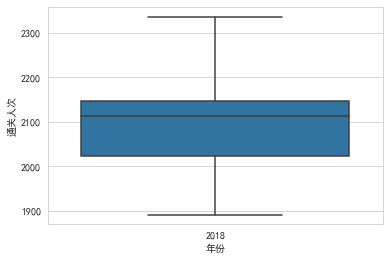

In [31]:
sns.boxplot(x='年份',y='通关人次',data=df2018,whis=1.6)

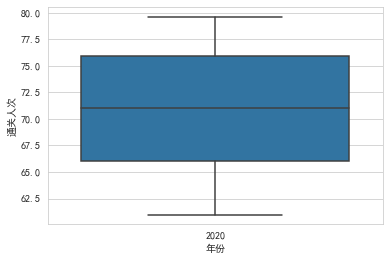

In [33]:
df2020=df[df['年份']==2020]
sns.boxplot(x='年份',y='通关人次',data=df2020,showfliers=False)

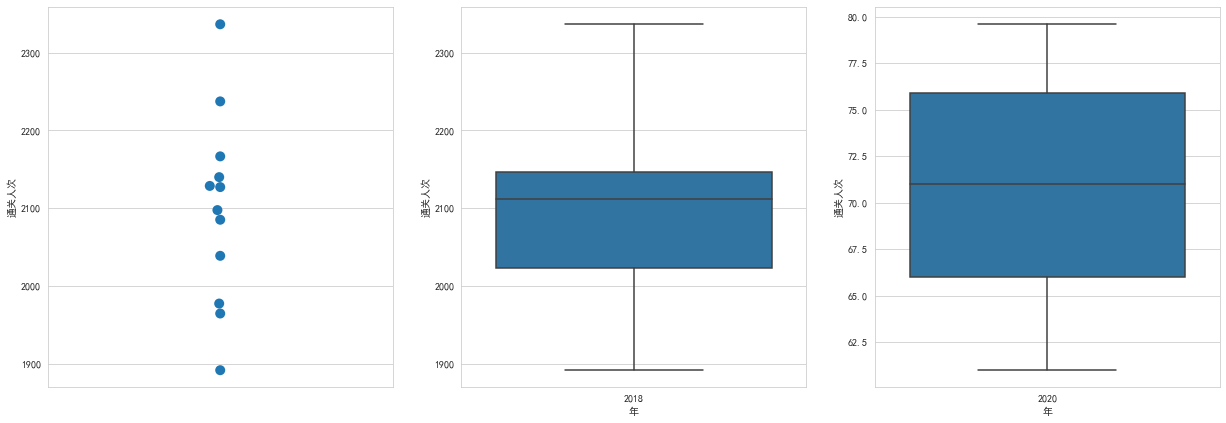

In [34]:
# 标准答案
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

# df = pd.read_csv(r'.\口岸出入境.csv')
df['发布时间'] = pd.to_datetime(df['发布时间'])
df['年'] = df['发布时间'].dt.year
df['月'] = df['发布时间'].dt.month
df_2018 = df[df['年']==2018]
df_2020 = df[df['年']==2020]

fig, axs = plt.subplots(1, 3, figsize=(21, 7))
sns.swarmplot(data=df_2018, y='通关人次', ax=axs[0], size=10)
sns.boxplot(data=df_2018, x='年', y='通关人次', ax=axs[1], whis=(0, 100))
sns.boxplot(data=df_2020, x='年', y='通关人次', ax=axs[2], showfliers=False);

###  下载并读取口岸通关数据，完成以下需求：

    1. 创建柱形图，展示发布时间在2020年和2021年中 2月、3月、4月 各月的通关人次，按年份绘制柱形图颜色；

    2. 创建箱型图，展示第1小题数据中2020年和2021年各年的通关人次分布，不显示异常值，显示均值线。

In [36]:
df['月份']=pd.to_datetime(df['发布时间'])
df['月份']=df['月份'].dt.month

,统计时间,发布时间,通关人次,年份,年,月,月份
0,2018年10月,2018-10-01,2237.2,2018,2018,10,10
1,2018年11月,2018-11-01,2128.5,2018,2018,11,11
2,2018年12月,2018-12-01,2336.4,2018,2018,12,12
3,2018年1月,2018-01-01,2097.4,2018,2018,1,1
4,2018年2月,2018-02-01,1891.5,2018,2018,2,2
...,...,...,...,...,...,...,...
37,2021年2月,2021-03-15,46.9,2021,2021,3,3
38,2021年3月,2021-04-15,68.1,2021,2021,4,4
39,2021年4月,2021-05-17,66.1,2021,2021,5,5
40,2021年5月,2021-06-15,66.1,2021,2021,6,6


In [44]:
df_ch1=df[(df['年份']==2020) | (df['年份']==2021) ]
df_ch1=df_ch1[(df_ch1['月份']==2) | (df_ch1['月份']==3) | (df_ch1['月份']==4)]
df_ch1

,统计时间,发布时间,通关人次,年份,年,月,月份
28,2020年2月,2020-02-01,114.3,2020,2020,2,2
29,2020年3月,2020-03-21,74.7,2020,2020,3,3
30,2020年4月,2020-04-20,61.0,2020,2020,4,4
36,2021年1月,2021-02-19,73.6,2021,2021,2,2
37,2021年2月,2021-03-15,46.9,2021,2021,3,3
38,2021年3月,2021-04-15,68.1,2021,2021,4,4


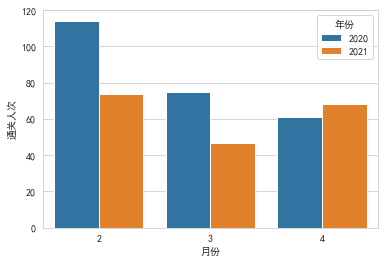

In [47]:
sns.barplot(data=df_ch1,x='月份',y='通关人次',hue='年份')

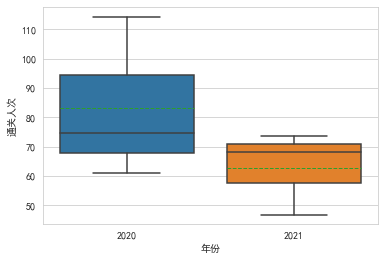

In [52]:
sns.boxplot(x='年份',y='通关人次',data=df_ch1,showfliers=False,meanline=True,showmeans=True)

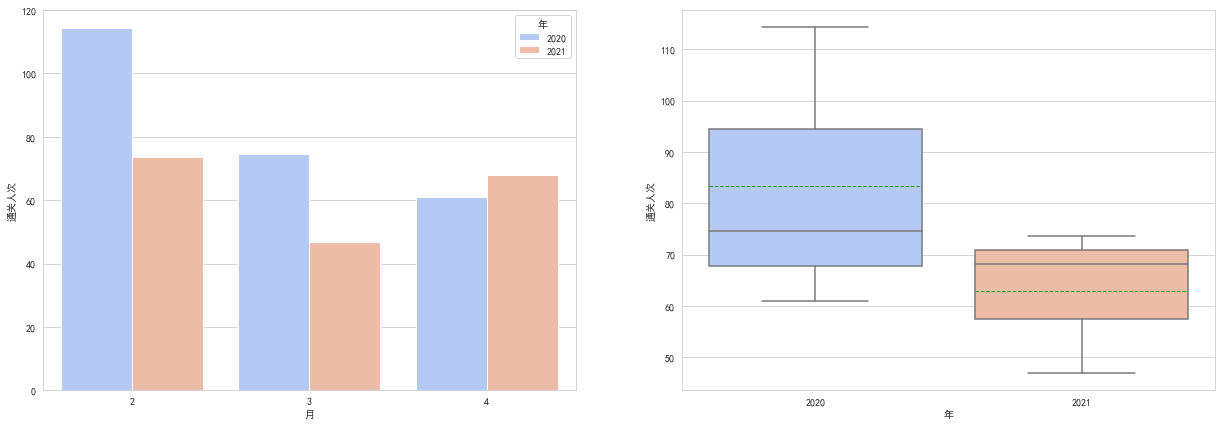

In [53]:
# 标准答案
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

# df = pd.read_csv(r'.\口岸出入境.csv')
df['发布时间'] = pd.to_datetime(df['发布时间'])
df['年'] = df['发布时间'].dt.year
df['月'] = df['发布时间'].dt.month
df_20_21 = df[(df['年']==2020) | (df['年']==2021)]
df_20_21 = df_20_21[df_20_21['月'].isin([2, 3, 4])]

fig, axs = plt.subplots(1, 2, figsize=(21, 7))
sns.barplot(data=df_20_21, x='月', y='通关人次', ax=axs[0], hue='年', palette='coolwarm')
sns.boxplot(data=df_20_21, x='年', y='通关人次', ax=axs[1], showfliers=False, 
            showmeans=True, meanline=True, palette='coolwarm');

### 下载并读取口岸通关数据，完成以下需求：

    1. 创建柱形图，展示每年的总通关人次；

    2. 创建气泡图，展示每年的平均通关人次，颜色按年分类；

    3. 创建分类散点图，展示每年的通关人次分布，颜色按月分类；

    4. 创建箱型图，展示2019年的通关人次分布，显示均值线。

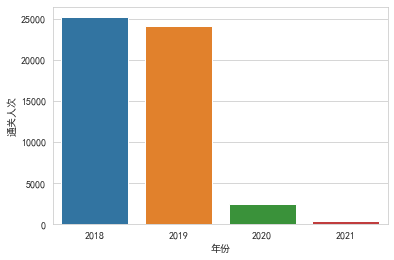

In [55]:
sns.barplot(data=df,x='年份',y='通关人次',estimator=np.sum,ci=None)

D:\CODE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\CODE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


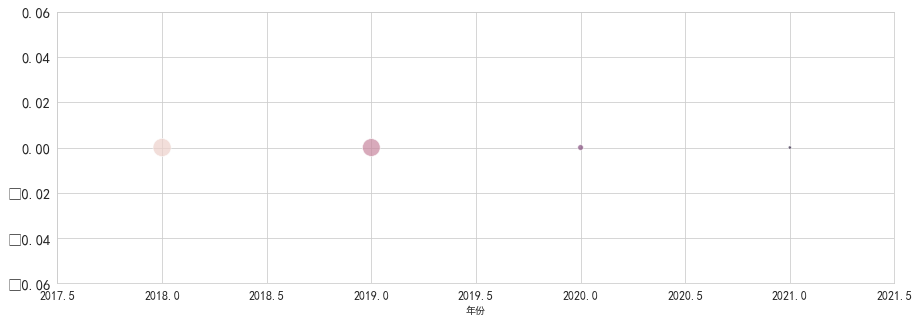

In [63]:
df_m=df.groupby('年份').mean()
g = sns.scatterplot(x=df_m.index, y=[0]*len(df_m), data=df_m, 
                    size='通关人次', alpha=0.7, hue=df_m.index, legend=False, 
                    sizes=( 10, 10 * df_m['通关人次'].max()/df_m['通关人次'].min() ))

g.figure.set_size_inches(15, 5) #图形大小设置
g.figure.canvas.draw() #画图
g.set_xticks(g.get_xticks())# 获取x轴数值
g.set_yticks(g.get_yticks()) #获取y轴数值
g.set_xticklabels(labels=g.get_xticklabels(), size='large')#x轴标签字体设置large 大号
g.set_yticklabels(labels=g.get_yticklabels(), size='x-large');#y轴标签字体设置为x-large 加大号

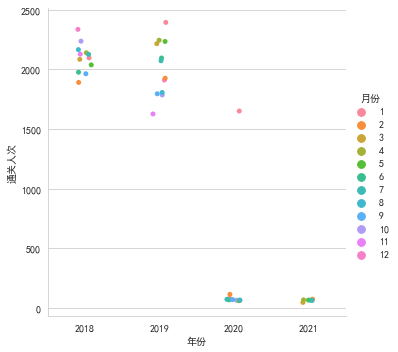

In [64]:
sns.catplot(data=df,x='年份',y='通关人次',kind='strip',hue='月份')

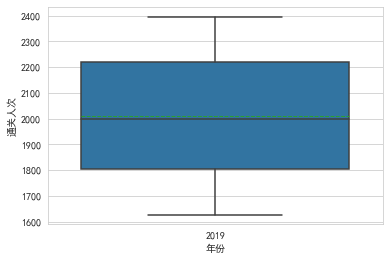

In [67]:
df2019=df[df['年份']==2019]
sns.boxplot(x='年份',y='通关人次',showmeans=True, meanline=True,data=df2019)

ValueError: Could not interpret input '年'

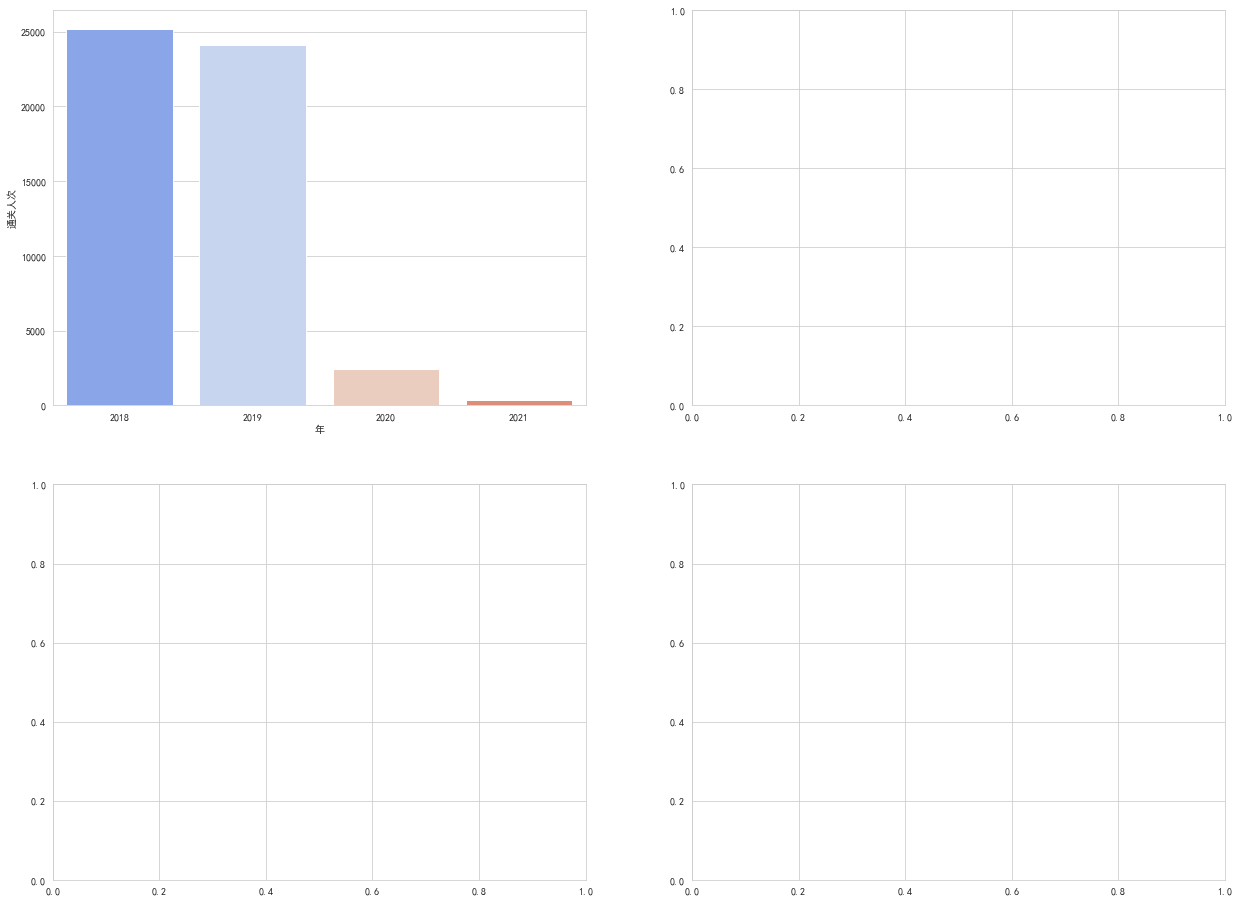

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False

# df = pd.read_csv(r'.\口岸出入境.csv')
df['发布时间'] = pd.to_datetime(df['发布时间'])
df['年'] = df['发布时间'].dt.year
df['月'] = df['发布时间'].dt.month
df_t = df.groupby('年')[['通关人次']].mean()
df_2019 = df[df['年']==2019]

fig, axs = plt.subplots(2, 2, figsize=(21, 16))
sns.barplot(data=df, x='年', y='通关人次', ax=axs[0][0], estimator=sum, palette='coolwarm', ci=None)
g = sns.scatterplot(data=df_t, x='年', y=[0]*len(df_t), ax=axs[0][1], 
                palette='coolwarm', legend=False, hue='年',
                size='通关人次', sizes=( 3*df_t['通关人次'].min(), 3*df_t['通关人次'].max() ))
g.set_xticks(g.get_xticks())
g.set_xticklabels(labels=g.get_xticks(), size='x-large')
sns.swarmplot(data=df, x='年', y='通关人次', ax=axs[1][0], palette='coolwarm', hue='月', size=10)
sns.boxplot(data=df_2019, x='年', y='通关人次', ax=axs[1][1], palette='coolwarm',
            showmeans=True, meanline=True);

###     下载并读取口岸通关数据，完成以下需求：

    利用学过的知识，找出数据集中所有处于前25%的数值，也就是箱型图上四分位以上的全部数据

In [74]:
df_s=df.sort_values('通关人次',ascending=False)
df_s.head(len(df_s)//4)

,统计时间,发布时间,通关人次,年份,年,月,月份
15,2019年1月,2019-01-01,2394.8,2019,2019,1,1
2,2018年12月,2018-12-01,2336.4,2018,2018,12,12
18,2019年4月,2019-04-01,2245.3,2019,2019,4,4
0,2018年10月,2018-10-01,2237.2,2018,2018,10,10
19,2019年5月,2019-05-01,2235.0,2019,2019,5,5
17,2019年3月,2019-03-01,2216.3,2019,2019,3,3
10,2018年8月,2018-08-01,2166.5,2018,2018,8,8
6,2018年4月,2018-04-01,2139.8,2018,2018,4,4
1,2018年11月,2018-11-01,2128.5,2018,2018,11,11
9,2018年7月,2018-07-01,2127.0,2018,2018,7,7


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

df = pd.read_csv(r'.\口岸出入境.csv')
df['发布时间'] = pd.to_datetime(df['发布时间'])
df['年'] = df['发布时间'].dt.year
df_2018 = df[df['年']==2018]

#方法一：
n = df_2018.describe().loc['75%','通关人次']
res1 = df_2018[df_2018['通关人次']>=n]
#方法二：
df_t = df_2018.sort_values('通关人次', ascending=False)
lengh = len(df_t)
res2 = df_t.iloc[:int(lengh*0.25)]  

In [75]:
df.describe()

,通关人次,年份,年,月,月份
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,1241.642857,2019.285714,2019.285714,6.214286,6.214286
std,989.878204,1.042645,1.042645,3.375202,3.375202
min,46.900000,2018.000000,2018.000000,1.000000,1.000000
25%,70.850000,2018.000000,2018.000000,3.250000,3.250000
50%,1801.650000,2019.000000,2019.000000,6.000000,6.000000
75%,2097.075000,2020.000000,2020.000000,9.000000,9.000000
max,2394.800000,2021.000000,2021.000000,12.000000,12.000000
